<a href="https://colab.research.google.com/github/Farisandim379/finalProject_CNN_Batik/blob/main/fp_cnn_batik5393.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/annaamikom/dataset-batik.git

Cloning into 'dataset-batik'...
remote: Enumerating objects: 1039, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1039 (delta 0), reused 3 (delta 0), pack-reused 1032 (from 1)
Receiving objects: 100% (1039/1039), 249.71 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
import os

# Definisikan path ke direktori Anda

base_dir = '/content/dataset-batik/dataset-batik'
train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'testing')

# Melihat beberapa file di dalam folder training
print("Contoh file di folder training:")
print(os.listdir(train_dir)[:5])

print("\nContoh file di folder testing:")
print(os.listdir(test_dir)[:5])

Contoh file di folder training:
['batik-ciamis', 'batik-gentongan', 'batik-sogan', 'batik-priangan', 'batik-betawi']

Contoh file di folder testing:
['batik-ciamis', 'batik-gentongan', 'batik-sogan', 'batik-priangan', 'batik-betawi']


In [6]:
import pandas as pd
import os

def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

tr_df = train_df(train_dir)
tr_df.head()

,Class Path,Class
0,/content/dataset-batik/dataset-batik/training/...,batik-ciamis
1,/content/dataset-batik/dataset-batik/training/...,batik-ciamis
2,/content/dataset-batik/dataset-batik/training/...,batik-ciamis
3,/content/dataset-batik/dataset-batik/training/...,batik-ciamis
4,/content/dataset-batik/dataset-batik/training/...,batik-ciamis


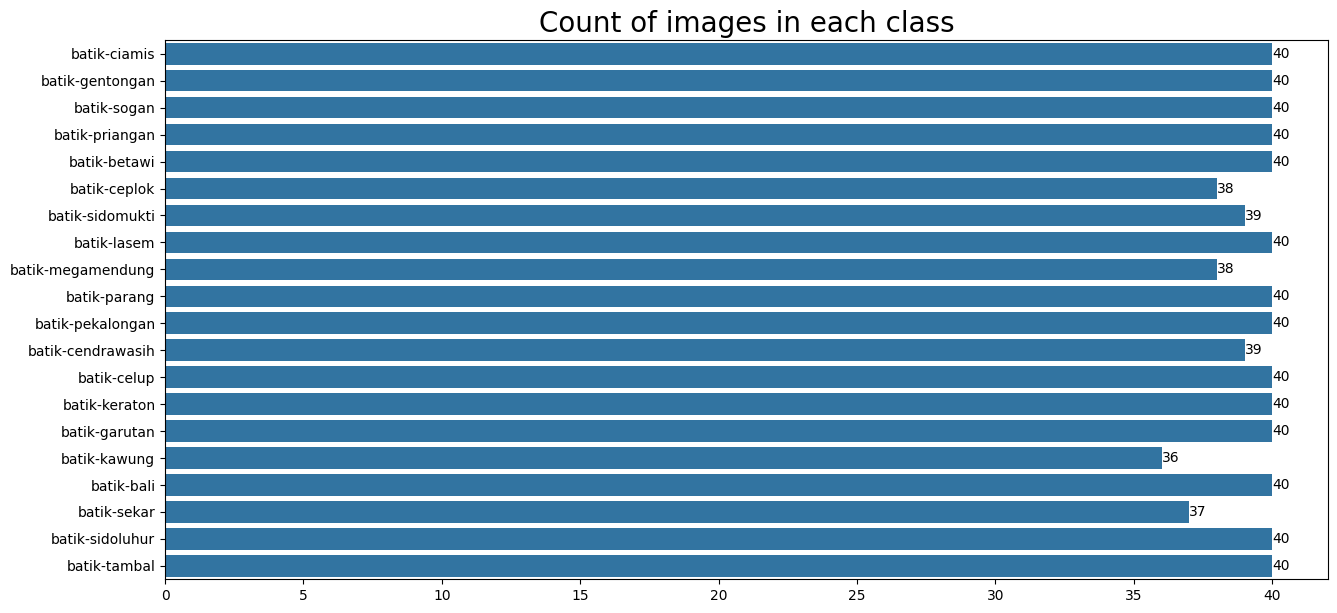

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

## Preprocessing Data

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Definisikan path ke direktori Anda
base_dir = '/content/dataset-batik'
train_dir = os.path.join(base_dir, 'dataset-batik', 'training')
test_dir = os.path.join(base_dir, 'dataset-batik', 'testing')

test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,

    brightness_range=[0.5, 1.5],

    width_shift_range=0.2,

    height_shift_range=0.2,

    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 633 images belonging to 20 classes.
Found 154 images belonging to 20 classes.


## Training Model

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Blok Konvolusi 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok Konvolusi 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok Konvolusi 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok Konvolusi 4
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok Konvolusi 5 (TAMBAHAN)
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Lapisan Klasifikasi
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Pastikan jumlah output Dense layer sesuai dengan jumlah kelas batik Anda
    tf.keras.layers.Dense(20, activation='softmax') # Changed from 15 to 20
])

# Menampilkan ringkasan model untuk memastikan arsitekturnya benar
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,266,068 (16.27 MB)

 Trainable params: 4,266,068 (16.27 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Setelah di-compile, Anda bisa mulai melatih model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

print(history.history.keys())

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.0440 - loss: 3.0233 - val_accuracy: 0.0714 - val_loss: 2.9956
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 968ms/step - accuracy: 0.0611 - loss: 2.9966 - val_accuracy: 0.0455 - val_loss: 2.9957
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 984ms/step - accuracy: 0.0522 - loss: 2.9957 - val_accuracy: 0.0519 - val_loss: 2.9824
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.0659 - loss: 2.9792 - val_accuracy: 0.0455 - val_loss: 2.9561
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 960ms/step - accuracy: 0.0796 - loss: 3.0438 - val_accuracy: 0.0844 - val_loss: 2.9210
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.0741 - loss: 2.9458 - val_accuracy: 0.1104 - val_loss: 2.8979
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 975ms/step - accuracy: 0.0879 - loss: 2.9292 - val_accuracy: 0.1104 - val_loss: 2.8754
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1029 - loss: 2.8757 - val_accuracy: 0.0779

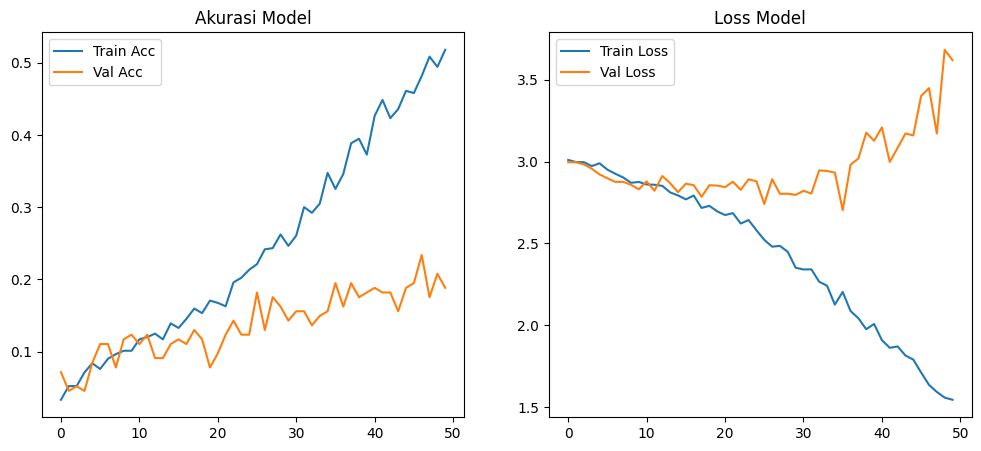

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi Model')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.legend()

plt.show()


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a separate ImageDataGenerator for the test set without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# If test folder is available
test_generator = test_datagen.flow_from_directory(
    '/content/dataset-batik/dataset-batik/testing',
    target_size=(240, 240),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Akurasi pada data test: {test_acc*100:.2f}%")

Found 194 images belonging to 20 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 0.1759 - loss: 4.1049
Akurasi pada data test: 18.04%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step


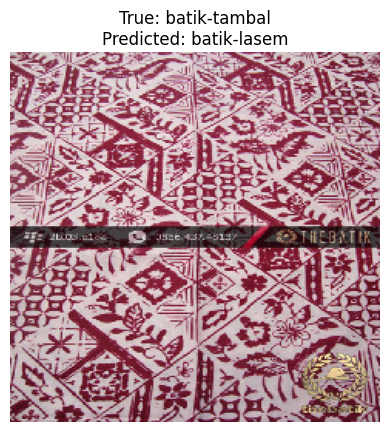

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


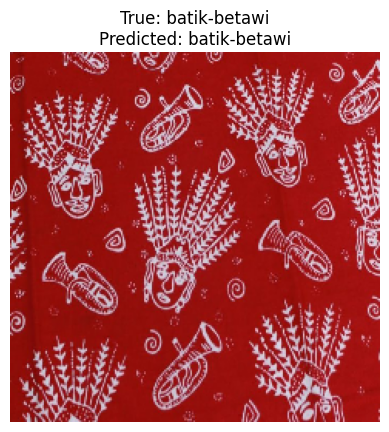

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


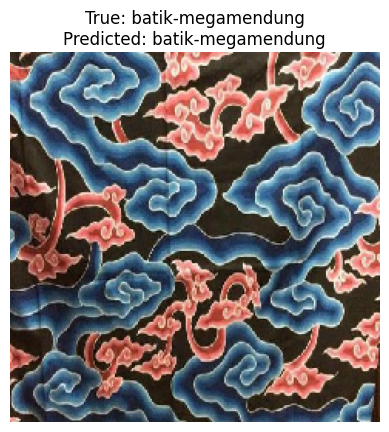

In [13]:
import random
from tensorflow.keras.preprocessing import image
import os
import numpy as np # Import numpy

classes = list(train_generator.class_indices.keys())
sample_images = []

training_base_dir = os.path.join(base_dir, 'dataset-batik', 'training')

for label in classes:
    path = os.path.join(training_base_dir, label)
    sample_images += [(os.path.join(path, img), label) for img in os.listdir(path)] # Store image path and true label

samples = random.sample(sample_images, 3)

for path, true_label in samples: # Get both path and true_label
    img = image.load_img(path, target_size=(240, 240)) # Changed target_size to 240x240
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_class}") # Display both true and predicted labels
    plt.axis('off')
    plt.show()